# Toronto Dwellings Analysis

In this assignment, you will perform fundamental analysis for the Toronto dwellings market to allow potential real estate investors to choose rental investment properties.

In [30]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
from panel import widgets

In [31]:
# Load .env environment variable and read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

#Set the Mapbox API
px.set_mapbox_access_token(map_box_api)

## Load Data

In [32]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/toronto_neighbourhoods_census_data.csv")
to_data = pd.read_csv(file_path, index_col="year")
to_data.head()

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
year,,,,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5,200388,810,870
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0,203047,806,892
2001,Alderwood,3175,315,0,470,50,185,370,0,259998,817,924
2001,Annex,1060,6090,5,1980,605,275,3710,165,453850,1027,1378
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0,371864,1007,1163


- - - 

## Dwelling Types Per Year

In this section, you will calculate the number of dwelling types per year. Visualize the results using bar charts and the Pandas plot function. 

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Plot each bar chart in a different color.

In [33]:
# Calculate the sum number of dwelling types units per year (hint: use groupby)
# Drop unneeded columns from the Dataframe
dwelling_type = to_data.loc[:, to_data.columns.drop(['neighbourhood', 'average_house_value','shelter_costs_owned', 'shelter_costs_rented'])]
dwelling_type
# Group data by index and sum
total_by_dwelling = dwelling_type.groupby(level=0).sum()
total_by_dwelling 

,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,
2001,300930,355015,75,90995,52355,23785,116900,3040
2006,266860,379400,165,69430,54690,44095,162850,1335
2011,274940,429220,100,72480,60355,44750,163895,2165
2016,269680,493270,95,71200,61565,48585,165575,2845


In [34]:
# Save the dataframe as a csv file
total_by_dwelling.to_csv('total_by_dwelling.csv', sep=',')

In [35]:
# Helper create_bar_chart function
def create_bar_chart(data, title, xlabel, ylabel, color):
    """
    Create a barplot based in the data argument.
    """


In [36]:
# Organise data for charting
total_by_dwelling_transposed = total_by_dwelling.transpose()
total_by_dwelling_transposed

year,2001,2006,2011,2016
single_detached_house,300930,266860,274940,269680
apartment_five_storeys_plus,355015,379400,429220,493270
movable_dwelling,75,165,100,95
semi_detached_house,90995,69430,72480,71200
row_house,52355,54690,60355,61565
duplex,23785,44095,44750,48585
apartment_five_storeys_less,116900,162850,163895,165575
other_house,3040,1335,2165,2845


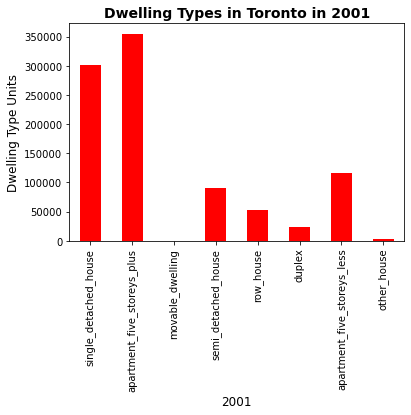

In [37]:
# Create a bar chart per year to show the number of dwelling types

# Bar chart for 2001
total_by_dwelling_transposed[2001].plot.bar(color = 'r')

# Set title and labels font size and font weight
xlabel = plt.xlabel('2001', fontsize=12)
ylabel = plt.ylabel('Dwelling Type Units', fontsize=12)
title = plt.title('Dwelling Types in Toronto in 2001', fontsize=14, fontweight='bold')

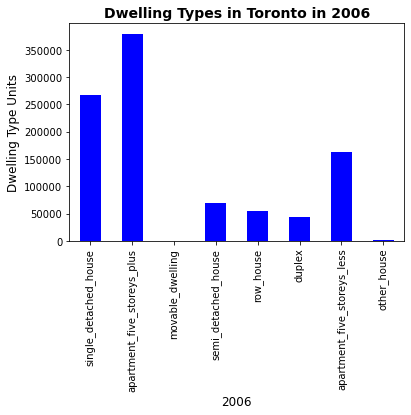

In [38]:
# Bar chart for 2006
total_by_dwelling_transposed[2006].plot.bar(color = 'b')

# Set title and labels font size and font weight
xlabel = plt.xlabel('2006', fontsize=12)
ylabel = plt.ylabel('Dwelling Type Units', fontsize=12)
title = plt.title('Dwelling Types in Toronto in 2006', fontsize=14, fontweight='bold')

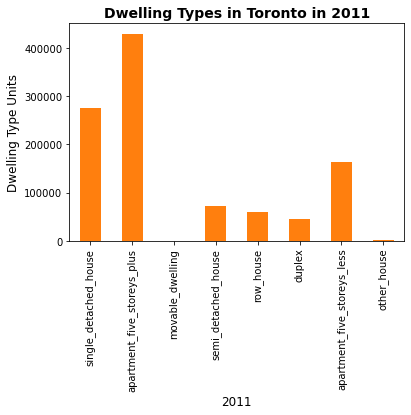

In [39]:
# Bar chart for 2011
total_by_dwelling_transposed[2011].plot.bar(color = 'tab:orange')

# Set title and labels font size and font weight
xlabel = plt.xlabel('2011', fontsize=12)
ylabel = plt.ylabel('Dwelling Type Units', fontsize=12)
title = plt.title('Dwelling Types in Toronto in 2011', fontsize=14, fontweight='bold')

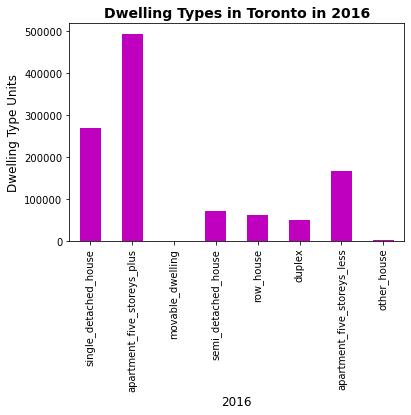

In [40]:
# Bar chart for 2016
total_by_dwelling_transposed[2016].plot.bar(color = 'm')

# Set title and labels font size and font weight
xlabel = plt.xlabel('2016', fontsize=12)
ylabel = plt.ylabel('Dwelling Type Units', fontsize=12)
title = plt.title('Dwelling Types in Toronto in 2016', fontsize=14, fontweight='bold')

- - - 

## Average Monthly Shelter Costs in Toronto Per Year

In this section, you will calculate the average monthly shelter costs for owned and rented dwellings and the average house value for each year. Plot the results as a line chart.

**Optional challenge:** Plot each line chart in a different color.

In [41]:
# Calculate the average monthly shelter costs for owned dwellings and rented dwellings
# Get shelter costs data
mthly_shelter_costs = to_data.iloc[:,[10, 11]].copy()

# Organise data and calculate average monthly cost per year
avgmthly_shelter_costs = mthly_shelter_costs.groupby(level=0).mean()

# # Print result
avgmthly_shelter_costs

,shelter_costs_owned,shelter_costs_rented
year,,
2001,846.878571,1085.935714
2006,1316.800000,925.414286
2011,1448.214286,1019.792857
2016,1761.314286,1256.321429


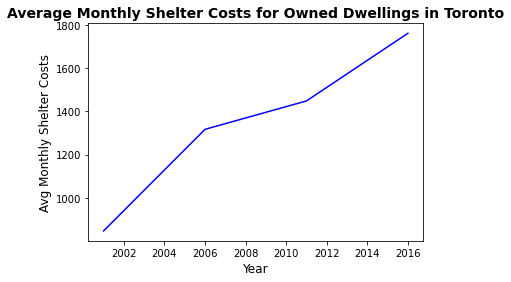

In [42]:
# Create two line charts, one to plot the monthly shelter costs for owned dwelleing and other for rented dwellings per year

# Line chart for owned dwellings
avgmthly_shelter_costs['shelter_costs_owned'].plot.line(color='b')

# Set title and labels font size and font weight
xlabel = plt.xlabel('Year', fontsize=12)
ylabel = plt.ylabel('Avg Monthly Shelter Costs', fontsize=12)
title = plt.title('Average Monthly Shelter Costs for Owned Dwellings in Toronto', fontsize=14, fontweight='bold')


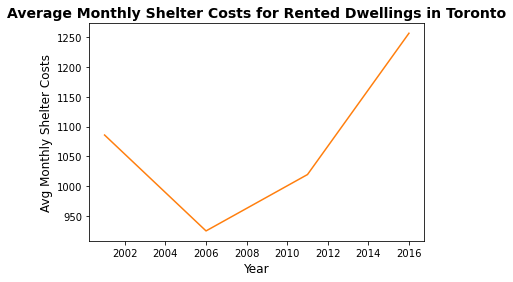

In [43]:
# Line chart for rented dwellings
avgmthly_shelter_costs['shelter_costs_rented'].plot.line(color='tab:orange')

# Set title and labels font size and font weight
xlabel = plt.xlabel('Year', fontsize=12)
ylabel = plt.ylabel('Avg Monthly Shelter Costs', fontsize=12)
title = plt.title('Average Monthly Shelter Costs for Rented Dwellings in Toronto', fontsize=14, fontweight='bold')

## Average House Value per Year

In this section, you want to determine the average house value per year. An investor may want to understand better the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property. You will visualize the `average_house_value` per year as a bar chart.

In [44]:
# Calculate the average house value per year

# Get avarage house value data
avg_house_value_data = to_data.loc[:,['average_house_value']].copy()

# Organise data to calculate average cost per year
avg_house_value = avg_house_value_data.groupby(level=0).mean()

# Print result
avg_house_value


,average_house_value
year,
2001,289882.885714
2006,424059.664286
2011,530424.721429
2016,664068.328571


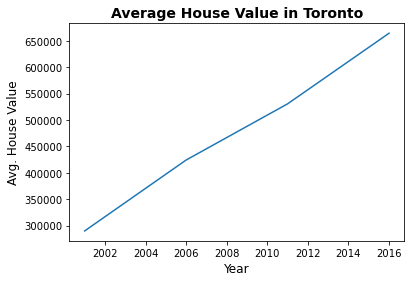

In [45]:
# Plot the average house value per year as a line chart
avg_house_value.plot.line().get_legend().remove()
# Set title and labels font size and font weight
xlabel = plt.xlabel('Year', fontsize=12)
ylabel = plt.ylabel('Avg. House Value', fontsize=12)
title = plt.title('Average House Value in Toronto', fontsize=14, fontweight='bold')

- - - 

## Average House Value by Neighbourhood

In this section, you will use `hvplot` to create an interactive visualization of the average house value with a dropdown selector for the neighbourhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean house values for each year and neighbourhood.

In [46]:
# Create a new DataFrame with the mean house values by neighbourhood per year
avg_house_value_neighbourhood = to_data.loc[:,['neighbourhood','average_house_value']].copy().reset_index()
avg_house_value_neighbourhood 

,year,neighbourhood,average_house_value
0,2001,Agincourt North,200388
1,2001,Agincourt South-Malvern West,203047
2,2001,Alderwood,259998
3,2001,Annex,453850
4,2001,Banbury-Don Mills,371864
...,...,...,...
555,2016,Wychwood,787760
556,2016,Yonge-Eglinton,1127052
557,2016,Yonge-St.Clair,1131888
558,2016,York University Heights,425769


In [47]:
# Use hvplot to create an interactive line chart of the average house value per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
plot_avg_house_value = avg_house_value_neighbourhood.hvplot(x='year', y='average_house_value', groupby='neighbourhood', kind='line', xlabel = 'Year' , ylabel = 'Avg. House Value')
plot_avg_house_value

:DynamicMap   [neighbourhood]
   :Curve   [year]   (average_house_value)

## Number of Dwelling Types per Year

In this section, you will use `hvplot` to create an interactive visualization of the average number of dwelling types per year with a dropdown selector for the neighbourhood.

In [48]:
# Fetch the data of all dwelling types per year

dwelling_types_data = to_data.drop(to_data.iloc[:, -3:], axis=1).copy()
dwelling_types_data

,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house
year,,,,,,,,,
2001,Agincourt North,3715,1480,0,1055,1295,195,185,5
2001,Agincourt South-Malvern West,3250,1835,0,545,455,105,425,0
2001,Alderwood,3175,315,0,470,50,185,370,0
2001,Annex,1060,6090,5,1980,605,275,3710,165
2001,Banbury-Don Mills,3615,4465,0,240,380,15,1360,0
...,...,...,...,...,...,...,...,...,...
2016,Wychwood,920,1295,0,880,290,395,2080,35
2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0
2016,Yonge-St.Clair,520,4315,0,450,220,130,1370,0


In [49]:
# Use hvplot to create an interactive bar chart of the number of dwelling types per neighbourhood
# The plot should have a dropdown selector for the neighbourhood
plot_dwelling_types = dwelling_types_data.hvplot(groupby='neighbourhood', kind='bar', rot=90, height = 500, ylabel='Dwelling Type Units', xlabel = 'Year', width = 600)
plot_dwelling_types

:DynamicMap   [neighbourhood]
   :Bars   [year,Variable]   (value)

- - - 

## The Top 10 Most Expensive Neighbourhoods

In this section, you will need to calculate the house value for each neighbourhood and then sort the values to obtain the top 10 most expensive neighbourhoods on average. Plot the results as a bar chart.

In [50]:
# Getting the data from the top 10 expensive neighbourhoods
top_10_neighbourhood = to_data.loc[:,['neighbourhood','average_house_value']].reset_index().groupby('neighbourhood').mean().drop(columns='year').sort_values('average_house_value', ascending = False)
top_10_neighbourhood.head(10)

,average_house_value
neighbourhood,
Bridle Path-Sunnybrook-York Mills,1526485.75
Forest Hill South,1195992.50
Lawrence Park South,1094027.75
Rosedale-Moore Park,1093640.00
St.Andrew-Windfields,999107.00
Casa Loma,981064.25
Bedford Park-Nortown,930415.25
Forest Hill North,851680.50
Kingsway South,843234.25


In [51]:
# Plotting the data from the top 10 expensive neighbourhoods
plot_top_10_neighbourhood = top_10_neighbourhood.iloc[0:10].hvplot(title = 'Top 10 Expensive Neighbourhoods in Toronto', kind='bar',xlabel = 'Neighbourhood', ylabel = 'Avg. House Values', rot = 45, height = 500)
plot_top_10_neighbourhood

:Bars   [neighbourhood]   (average_house_value)

- - - 

## Neighbourhood Map

In this section, you will read in neighbourhoods location data and build an interactive map with the average house value per neighbourhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [52]:
# Load neighbourhoods coordinates data
file_path = Path("Data/toronto_neighbourhoods_coordinates.csv")
df_neighbourhood_locations = pd.read_csv(file_path)
df_neighbourhood_locations.head()
# df_neighbourhood_locations.neighbourhood.nunique()

,neighbourhood,lat,lon
0,Agincourt North,43.805441,-79.266712
1,Agincourt South-Malvern West,43.788658,-79.265612
2,Alderwood,43.604937,-79.541611
3,Annex,43.671585,-79.404001
4,Banbury-Don Mills,43.737657,-79.349718


### Data Preparation

You will need to join the location data with the mean values per neighbourhood.

1. Calculate the mean values for each neighbourhood.

2. Join the average values with the neighbourhood locations.

In [53]:
# Calculate the mean values for each neighborhood
avg_value_neighbourhood = to_data.loc[:,['neighbourhood','average_house_value']].groupby('neighbourhood').mean().reset_index()
avg_value_neighbourhood

,neighbourhood,average_house_value
0,Agincourt North,329811.50
1,Agincourt South-Malvern West,334189.00
2,Alderwood,427922.50
3,Annex,746977.00
4,Banbury-Don Mills,612039.00
...,...,...
135,Wychwood,565976.50
136,Yonge-Eglinton,809745.75
137,Yonge-St.Clair,813220.25
138,York University Heights,305899.50


In [54]:
# Join the average values with the neighbourhood locations
joined_data_avg_value = pd.concat([avg_value_neighbourhood, df_neighbourhood_locations], join='inner', axis=1).set_index('neighbourhood')
joined_data_avg_value

,average_house_value,lat,lon
neighbourhood,,,
"(Agincourt North, Agincourt North)",329811.50,43.805441,-79.266712
"(Agincourt South-Malvern West, Agincourt South-Malvern West)",334189.00,43.788658,-79.265612
"(Alderwood, Alderwood)",427922.50,43.604937,-79.541611
"(Annex, Annex)",746977.00,43.671585,-79.404001
"(Banbury-Don Mills, Banbury-Don Mills)",612039.00,43.737657,-79.349718
...,...,...,...
"(Wychwood, Wychwood)",565976.50,43.676919,-79.425515
"(Yonge-Eglinton, Yonge-Eglinton)",809745.75,43.704689,-79.403590
"(Yonge-St.Clair, Yonge-St.Clair)",813220.25,43.687859,-79.397871


### Mapbox Visualization

Plot the average values per neighbourhood using a Plotly express `scatter_mapbox` visualization.

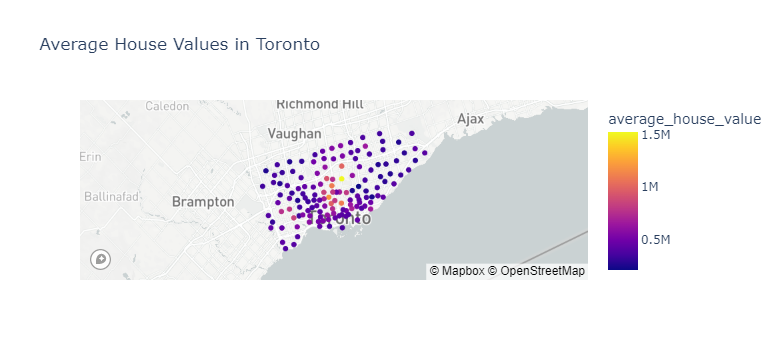

In [55]:
# Create a scatter mapbox to analyze neighbourhood info
map_neighbourhood_avg_values = px.scatter_mapbox(
                        joined_data_avg_value,
                        lat = 'lat',
                        lon = 'lon',
                        color = 'average_house_value',
                        title = 'Average House Values in Toronto')

map_neighbourhood_avg_values.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to a couple of plots that investors can interactively filter and explore various factors related to the house value of the Toronto's neighbourhoods. 

### Create a bar chart row facet to plot the average house values for all Toronto's neighbourhoods per year

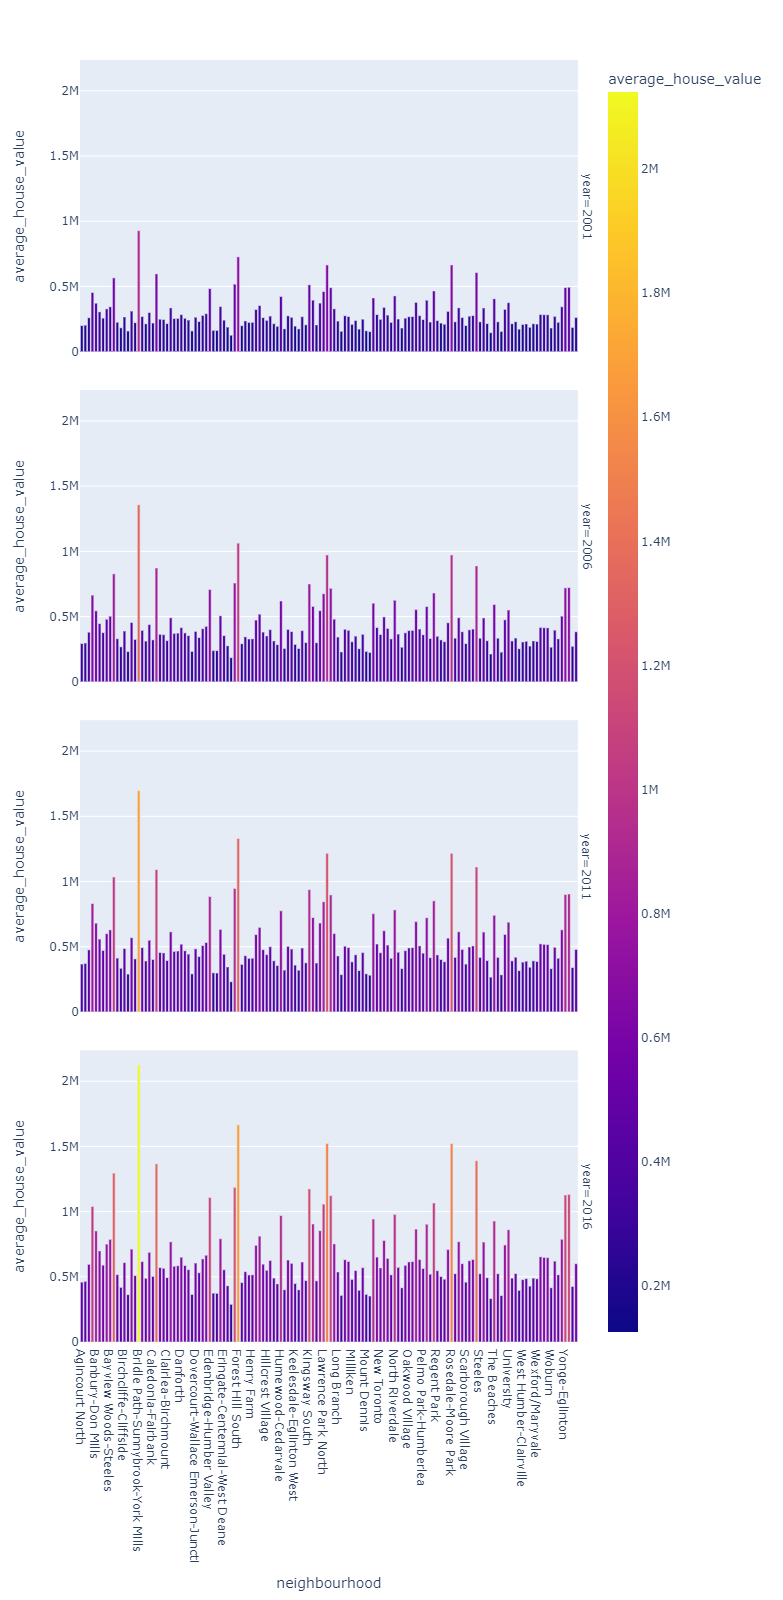

In [56]:
plot_avg_house_values = px.bar(avg_house_value_neighbourhood, x='neighbourhood', y='average_house_value', facet_row = 'year', color = 'average_house_value', height=1600)
plot_avg_house_values.show()

### Create a sunburst chart to conduct a costs analysis of most expensive neighbourhoods in Toronto per year

In [57]:
# Get data of top 10 most expensive neighbourhood per year
cost_analysis_data = to_data.reset_index().sort_values('shelter_costs_owned',ascending = False).groupby('year').head(10)
cost_analysis_data

,year,neighbourhood,single_detached_house,apartment_five_storeys_plus,movable_dwelling,semi_detached_house,row_house,duplex,apartment_five_storeys_less,other_house,average_house_value,shelter_costs_owned,shelter_costs_rented
436,2016,Bridle Path-Sunnybrook-York Mills,2275,590,0,40,230,30,80,0,2124653,2903,2942
489,2016,Lawrence Park South,3420,925,0,110,35,230,1015,5,1522732,2644,1515
531,2016,St.Andrew-Windfields,3245,1745,0,175,540,120,595,5,1390616,2516,1565
524,2016,Rosedale-Moore Park,2450,4990,0,485,260,345,1505,5,1522193,2498,1809
441,2016,Casa Loma,875,2680,0,265,200,155,1225,0,1365503,2434,1841
429,2016,Bedford Park-Nortown,4820,1995,0,45,65,315,1260,115,1295007,2418,1385
556,2016,Yonge-Eglinton,1400,1995,0,465,60,310,1445,0,1127052,2398,1535
296,2011,Bridle Path-Sunnybrook-York Mills,2285,480,0,45,100,30,50,0,1697067,2387,2388
464,2016,Forest Hill South,1685,2025,0,65,40,70,1050,0,1664653,2383,1486
488,2016,Lawrence Park North,3110,205,0,885,30,185,1005,0,1056967,2338,1589


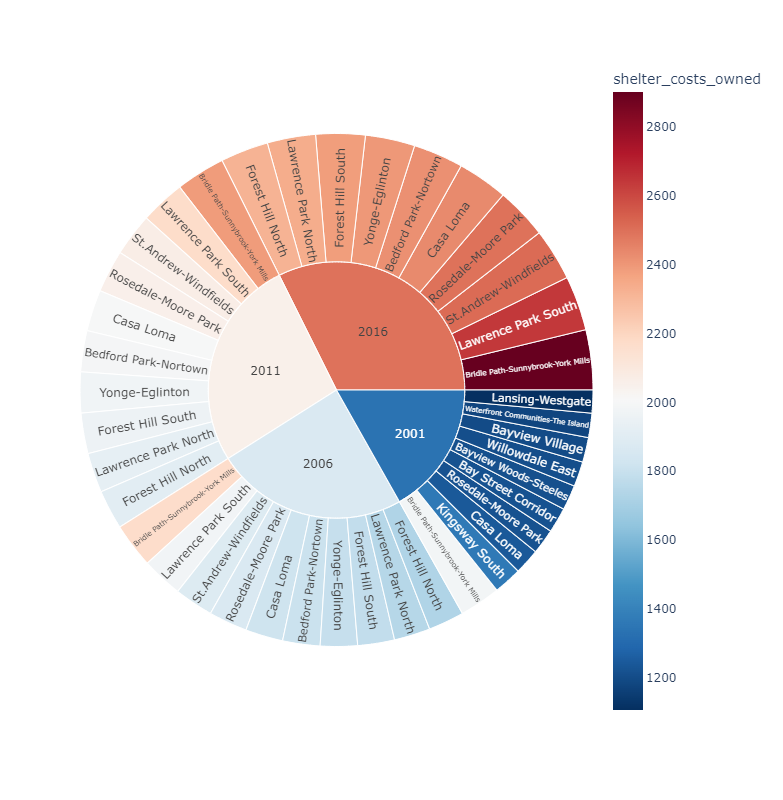

In [58]:
# Create sunburst chart
plot_cost_analysis = px.sunburst(cost_analysis_data, path=['year','neighbourhood'], values='shelter_costs_owned', width = 1000, height = 800,
                  color='shelter_costs_owned', hover_data=['shelter_costs_owned'],
                  color_continuous_scale='RdBu_r')
plot_cost_analysis.show()